# Overplotting multiple spectra that have been normalized at a user-provided wavelength / frequency / wave number

# 1. Read in multiple spectra.

In [205]:
#Install packages we need
!pip install astropy
!pip install scipy
!pip install matplotlib
from astropy.io.votable import parse_single_table

dir = "" #"/Users/vandanadesai/IPAC/IRSA/Firefly/spectral_data_model/"
file1 = dir+"1342235804_averageSpectrumWML_7b_1897_2016-03-10T18-46-38UTC.votable"
file2 = dir+"F0291_EX_SPE_04012012_EXEELONEXEECHL_CMB_0040-0043.votable"
file3 = dir+"HD_143006.votable"
file4 = dir+"SPITZER_S0_25343744_0001_3_E7173899_tune.votable"
file5 = dir+"SPITZER_S3_3757824_0013_12_E7212632_tune.votable"

spectrum1 = parse_single_table(file1)
spectrum2 = parse_single_table(file2)
spectrum3 = parse_single_table(file3)
spectrum4 = parse_single_table(file4)
spectrum5 = parse_single_table(file5)

## 2. Ask the user for the wavelength they want to normalize at.

In [206]:
normalization_value = 24.
normalization_ucd = "em.wl"
normalization_unit = "micron"

## 3. For each spectrum, identify the field with utype = "spec:Spectrum.Data.SpectralAxis.Value" and determine the corresponding ucd and units.

In [149]:
for field in spectrum1.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        ucd1 = field.ucd
        unit1 = field.unit
        print(ucd1)
        print(unit1)
        print(" ")
        
for field in spectrum2.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        ucd2 = field.ucd
        unit2 = field.unit
        print(ucd2)
        print(unit2)
        print(" ")
        
for field in spectrum3.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        ucd3 = field.ucd
        unit3 = field.unit
        print(ucd3)
        print(unit3)
        print(" ")
        
for field in spectrum4.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        ucd4 = field.ucd
        unit4 = field.unit
        print(ucd4)
        print(unit4)
        print(" ")
        
for field in spectrum5.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        ucd5 = field.ucd
        unit5 = field.unit
        print(ucd5)
        print(unit5)
        print(" ")

em.freq
GHz
 
em.wavenumber
cm**(-1)
 
em.wl
um
 
em.wl
um
 
em.wl
um
 


## 4. For any spectra that do not share units with the user-entered normalized spectra, change the utype and units and array values. Leave the other spectra alone.

In [150]:
spectrum1_toplot = spectrum1
spectrum2_toplot = spectrum2
spectrum3_toplot = spectrum3
spectrum4_toplot = spectrum4
spectrum5_toplot = spectrum5

for field in spectrum1_toplot.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        print("spectrum 1")
        print("old ucd: "+ field.ucd)
        print("old unit: ", field.unit)
        print("old x axis: ")
        print(spectrum1.array[field.name])
        print(" ")
        
        spectrum1_toplot.fields.ucd = normalization_ucd
        spectrum1_toplot.fields.unit = normalization_unit
        spectrum1_toplot.array[field.name] =  299792.458 / spectrum1.array[field.name]
        
        print("new ucd: "+ spectrum1_toplot.fields.ucd)
        print("new unit: ", spectrum1_toplot.fields.unit)
        print("new x axis: ")
        print(spectrum1_toplot.array[field.name])
        print(" ")

        
for field in spectrum2_toplot.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        print("spectrum 2")
        print("old ucd: "+ field.ucd)
        print("old unit: ", field.unit)
        print("old x axis: ")
        print(spectrum2.array[field.name])
        print(" ")
        
        spectrum2_toplot.fields.ucd = normalization_ucd
        spectrum2_toplot.fields.unit = normalization_unit
        spectrum2_toplot.array[field.name] =  299792.458 / spectrum2.array[field.name]
        
        print("new ucd: "+ spectrum2_toplot.fields.ucd)
        print("new unit: ", spectrum2_toplot.fields.unit)
        print("new x axis: ")
        print(spectrum2_toplot.array[field.name])
        print(" ")


spectrum 1
old ucd: em.freq
old unit:  GHz
old x axis: 
[1892.4999999999998 1892.5004999999996 1892.5009999999997 ...
 1895.0514999999998 1895.0519999999997 1895.0524999999998]
 
new ucd: em.wl
new unit:  micron
new x axis: 
[158.41081003963012 158.41076818737963 158.41072633515122 ...
 158.1975255026051 158.19748376297855 158.19744202337404]
 
spectrum 2
old ucd: em.wavenumber
old unit:  cm**(-1)
old x axis: 
[1491.2906494140625 1491.29248046875 1491.2943115234375 ... -- -- --]
 
new ucd: em.wl
new unit:  micron
new x axis: 
[201.02885920849187 201.02861237908732 201.0283655502889 ... -- -- --]
 


## 5. For each spectrum, check to see that the spectral axis grid values bracket the user-specified normalization value.

In [163]:
for field in spectrum1_toplot.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        spectrum1_min = min(spectrum1.array[field.name])
        spectrum1_max = max(spectrum1.array[field.name])
        print("spectrum1_min, normalization_value, spectrum1_max:", spectrum1_min, normalization_value, spectrum1_max)
        
   
for field in spectrum2_toplot.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        spectrum2_min = min(spectrum2.array[field.name])
        spectrum2_max = max(spectrum2.array[field.name])
        print("spectrum2_min, normalization_value, spectrum2_max:", spectrum2_min, normalization_value, spectrum2_max)
 

for field in spectrum3_toplot.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        spectrum3_min = min(spectrum3.array[field.name])
        spectrum3_max = max(spectrum3.array[field.name])
        print("spectrum3_min, normalization_value, spectrum3_max:", spectrum3_min, normalization_value, spectrum3_max)

for field in spectrum4_toplot.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        spectrum4_min = min(spectrum4.array[field.name])
        spectrum4_max = max(spectrum4.array[field.name])
        print("spectrum4_min, normalization_value, spectrum4_max:", spectrum4_min, normalization_value, spectrum4_max)

for field in spectrum5_toplot.fields:
    if field.utype == "spec:Spectrum.Data.SpectralAxis.Value":
        spectrum5_min = min(spectrum5.array[field.name])
        spectrum5_max = max(spectrum5.array[field.name])
        print("spectrum5_min, normalization_value, spectrum5_max:", spectrum5_min, normalization_value, spectrum5_max)


spectrum1_min, normalization_value, spectrum1_max: 158.19744202337404 24.0 158.41081003963012
spectrum2_min, normalization_value, spectrum2_max: 200.81905922048935 24.0 202.54484691083826
spectrum3_min, normalization_value, spectrum3_max: 9.954 24.0 36.47
spectrum4_min, normalization_value, spectrum4_max: 5.12652 24.0 8.60434
spectrum5_min, normalization_value, spectrum5_max: 18.82939 24.0 37.13596


## 6. Warn the user that only spectra 3 and 5 can be safely interpolated. For these two spectra, interpolate to determine the flux at the user-requested wavelength. Normalize each spectrum so that the flux at the user-requested wavelength is unity.

In [202]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

x3 = spectrum3_toplot.array['lambda']
y3 = spectrum3_toplot.array['Y']
f3 = interp1d(x3, y3, kind='linear')
y3_new = f3(normalization_value)
normalization_factor3 = 1.0 / y3_new

x5 = spectrum5_toplot.array['wavelength']
y5 = spectrum5_toplot.array['flux_density']
f5 = interp1d(x5, y5, kind='linear')
y5_new = f5(normalization_value)
normalization_factor5 = 1.0 / y5_new

## 7. Plot the normalized spectra. Note that the spectra cross at x = 24 micron, and the y value at 24 micron is 1. (Ideally, you'd plot each order separately. Not going to bother with that here because Firefly already knows how to do that.)

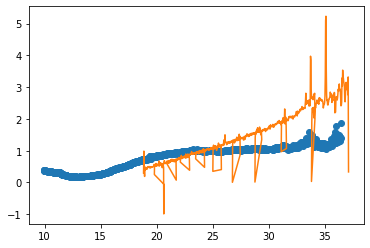

In [207]:
plt.plot(x3, y3 * normalization_factor3, 'o', x5, y5 * normalization_factor5, '-')
plt.show()